In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [65]:
import pandas as pd
import numpy as np

### Loading DataSet

In [48]:
df = pd.read_csv('EngineeredFeatures.csv')

In [49]:
df.shape

(33245, 66)

### Normalization

In [50]:
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,columns=df.columns)

In [52]:
df.head()

,insurance,marital_status,hospital_expire_flag,los,gender,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,peripheral_vascular,...,BloodGlucose,BloodLipase,BloodMagnesium,BloodPotassium,BloodSodium,PlateletCount,RedBloodCells,WhiteBloodCells,Lymphocytes,icd9_code
0,0.0,0.500000,0.0,0.009664,0.0,0.0,0.0,0.0,0.0,0.0,...,0.224284,0.003677,0.267836,0.507993,0.433204,0.190941,0.407427,0.021616,0.120253,1.0
1,0.0,0.500000,0.0,0.014262,0.0,0.0,0.0,0.0,0.0,1.0,...,0.224284,0.003677,0.267836,0.507993,0.433204,0.190941,0.407427,0.021616,0.120253,1.0
2,0.0,0.666667,1.0,0.098174,1.0,1.0,1.0,1.0,1.0,0.0,...,0.169156,0.011359,0.270451,0.391509,0.561402,0.103901,0.239730,0.028806,0.120253,1.0
3,0.0,0.000000,0.0,0.102056,0.0,1.0,1.0,1.0,1.0,0.0,...,0.166280,0.003077,0.258630,0.368229,0.529849,0.209911,0.305990,0.042878,0.120253,1.0
4,0.0,0.500000,0.0,0.011930,0.0,0.0,0.0,0.0,0.0,0.0,...,0.204310,0.003602,0.264327,0.452033,0.493134,0.295290,0.360472,0.018465,0.120253,1.0


In [53]:
df_majority = df[df['icd9_code']==0.0]
df_minority = df[df['icd9_code']==1.0]

## Down Sampling

In [54]:
df_minority.shape

(2754, 66)

In [56]:
# Downsample majority class
from sklearn.utils import resample
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=2754,     # to match minority class
                                 random_state=123) # reproducible results

In [57]:
df_majority_downsampled.shape

(2754, 66)

In [58]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [60]:
# Display new class counts
df_downsampled['icd9_code'].value_counts()

1.0    2754
0.0    2754
Name: icd9_code, dtype: int64

### Model Training

In [66]:
# Separate input features (X) and target variable (y)
y = df_downsampled['icd9_code']
X = df_downsampled.drop(['icd9_code'], axis=1)

where_are_NaNs = np.isnan(X)
X[where_are_NaNs] = 0

# Train model
clf_2 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_2 = clf_2.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_2 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_2))

[0. 1.]
0.6675744371822803


C:\Users\faisal.maqbool\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [67]:
X.shape

(5508, 65)

In [68]:
y.shape

(5508,)

# SVM

In [70]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

In [72]:
# Train model
clf_3 = SVC(kernel='linear', 
            class_weight='balanced', # penalize
            probability=True)
 
clf_3.fit(X, y)
 
# Predict on training set
pred_y_3 = clf_3.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_3 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_3) )
# 0.688
 
# What about AUROC?
prob_y_3 = clf_3.predict_proba(X)
prob_y_3 = [p[1] for p in prob_y_3]
print( roc_auc_score(y, prob_y_3) )

[0. 1.]
0.675199709513435
0.7378128017661245


# RandomForrest

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
# Train model
clf_4 = RandomForestClassifier()
clf_4.fit(X, y)
 
# Predict on training set
pred_y_4 = clf_4.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_4) )
 
# What about AUROC?
prob_y_4 = clf_4.predict_proba(X)
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(y, prob_y_4) )

C:\Users\faisal.maqbool\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0. 1.]
0.9907407407407407
0.9995834935281301


In [82]:
df_majority.shape

(30491, 66)

In [83]:
df_majority = df_majority.sample(6500)

In [84]:
df_majority.shape

(6500, 66)

# For Upsampling

In [85]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority, df_minority])

In [94]:
df_downsampled.shape

(9254, 66)

In [95]:
df_majority = df_downsampled[df_downsampled['icd9_code'] == 0.0]
df_minority = df_downsampled[df_downsampled['icd9_code'] == 1.0]

In [97]:
df_majority.shape

(6500, 66)

# Upsampled

In [99]:
# Separate majority and minority classes

 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=6500,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['icd9_code'].value_counts()

1.0    6500
0.0    6500
Name: icd9_code, dtype: int64

In [101]:
# Separate input features (X) and target variable (y)
y = df_upsampled['icd9_code']
X = df_upsampled.drop(['icd9_code'], axis=1)


where_are_NaNs = np.isnan(X)
X[where_are_NaNs] = 0
# Train model
clf_1 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_1 = clf_1.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_1 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_1))

C:\Users\faisal.maqbool\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0. 1.]
0.6671538461538462


In [102]:

# Predict class probabilities
prob_y_2 = clf_2.predict_proba(X)
 
# Keep only the positive class
prob_y_2 = [p[1] for p in prob_y_2]
 
prob_y_2[:5]

[0.49044940146993565,
 0.41989383997765795,
 0.40641705893283653,
 0.2733401440384406,
 0.3186461486406362]

In [103]:
print( roc_auc_score(y, prob_y_2) )
# 0.568096626406

0.7249030769230769


# SVC on Upsampled dataset

In [104]:
# Train model
clf_3 = SVC(kernel='linear', 
            class_weight='balanced', # penalize
            probability=True)
 
clf_3.fit(X, y)
 
# Predict on training set
pred_y_3 = clf_3.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_3 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_3) )
 
# What about AUROC?
prob_y_3 = clf_3.predict_proba(X)
prob_y_3 = [p[1] for p in prob_y_3]
print( roc_auc_score(y, prob_y_3) )

[0. 1.]
0.6754615384615384
0.7319090414201184


# RandomForrest on Upsampled Data

In [105]:
clf_4 = RandomForestClassifier()
clf_4.fit(X, y)
 
# Predict on training set
pred_y_4 = clf_4.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_4) )
 
# What about AUROC?
prob_y_4 = clf_4.predict_proba(X)
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(y, prob_y_4) )

C:\Users\faisal.maqbool\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0. 1.]
0.9973846153846154
0.9999630532544379


In [116]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [108]:
confusion_matrix(y, pred_y_4)

array([[6492,    8],
       [  26, 6474]], dtype=int64)

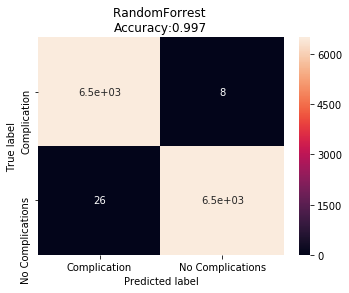

In [119]:
labels = ['complication', 'No Complication']
cm = confusion_matrix(y, pred_y_4) 

cm_df = pd.DataFrame(cm,
                     index = ['Complication','No Complications'], 
                     columns = ['Complication','No Complications'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('RandomForrest \nAccuracy:{0:.3f}'.format(accuracy_score(y, pred_y_4)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()